# IE517 MLF F20
# Module 7 Homework (Random Forest)

Yaxuan Wang (yaxuanw3)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\Yaxuan Mandy Wang\Desktop\ccdefault.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


I randomly select 90% of the dataset into training set, and the rest 10% into testing set. 

In [5]:
X = df.iloc[:, 1:24].values
y = df['DEFAULT'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

First, I fitted the random forest model by using `GridSearchCV` to apply 10-fold cross validation and find the best value for n_estimators

In [6]:
#import warnings
#warnings.filterwarnings('ignore')

#cv_score = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10)
#print('CV accuracy scores for each fold are: %s \n' % cv_score)
#print('\n Averaged CV accuracy scores is: %s' % np.mean(cv_score))

In [13]:
import warnings
warnings.filterwarnings('ignore')

params_rf = {'n_estimators':[10, 20, 50, 80, 100, 200]}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_rf,scoring='accuracy', cv=10,n_jobs=-1,verbose=1)

grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:', best_hyperparams)

best_CV_score = grid_rf.best_score_
print('Best in-sample CV accuracy:%f'%(best_CV_score))

best_model = grid_rf.best_estimator_
test_acc = best_model.score(X_train,y_train)
print("train set accuracy of best model: {:.3f}".format(test_acc))

grid_rf.cv_results_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.3min finished


Best hyerparameters: {'n_estimators': 100}
Best in-sample CV accuracy:0.816519
train set accuracy of best model: 0.999


{'mean_fit_time': array([ 1.1086405 ,  2.20636744,  5.5644026 ,  8.78129551, 11.24342875,
        22.77287703]),
 'std_fit_time': array([0.02616587, 0.03270302, 0.11793837, 0.10021025, 0.20528111,
        2.41116669]),
 'mean_score_time': array([0.0121176 , 0.02220745, 0.05215151, 0.08529217, 0.1091882 ,
        0.22240477]),
 'std_score_time': array([0.00147382, 0.00372058, 0.00316765, 0.00900528, 0.0081027 ,
        0.04439443]),
 'param_n_estimators': masked_array(data=[10, 20, 50, 80, 100, 200],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 50},
  {'n_estimators': 80},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'split0_test_score': array([0.80118475, 0.81007034, 0.81192151, 0.80970011, 0.81081081,
        0.81155128]),
 'split1_test_score': array([0.79526101, 0.80192521, 0.80525731, 0.80155498, 0.80673825,
        0.80451685]),
 

## Part 1: Random Forest Estimators

Here, I fit a random forest model and try several different values for n_estimators, which are 10, 20, 50, 80, 100, 200. 

In [14]:
params = [10, 20, 50, 80, 100, 200]

In = []

for p in params:
    rf = RandomForestClassifier(n_estimators = p)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    In.append(accuracy_score(y_train, y_pred_train))


In [15]:
print('The in-sample accuracies for each n_estimators are: %s' % In)

The in-sample accuracies for each n_estimators are: [0.9788888888888889, 0.992037037037037, 0.9988888888888889, 0.9993703703703704, 0.9994074074074074, 0.9994074074074074]


As the value of n_estimators increase, the accuracy score will also increase. When n_estimators is 100 and 200, the accuracy reaches the highest value, 0.9994074074074074.

## Part 2: Random Forest Feature Importance

Now let's use one of the feature in random forest, which is feature importance. The below table and plot show the descending order in feature importance and their scores of importance. 

 1) PAY_0                          0.094127
 2) AGE                            0.066822
 3) BILL_AMT1                      0.060389
 4) LIMIT_BAL                      0.060225
 5) BILL_AMT2                      0.054624
 6) PAY_2                          0.051882
 7) BILL_AMT3                      0.051443
 8) BILL_AMT6                      0.050730
 9) PAY_AMT1                       0.050328
10) BILL_AMT5                      0.050281
11) BILL_AMT4                      0.050129
12) PAY_AMT2                       0.047797
13) PAY_AMT3                       0.046502
14) PAY_AMT6                       0.045944
15) PAY_AMT5                       0.043227
16) PAY_AMT4                       0.042657
17) PAY_3                          0.025933
18) PAY_4                          0.023369
19) EDUCATION                      0.020129
20) PAY_5                          0.019527
21) PAY_6                          0.017621
22) MARRIAGE                       0.014216
23) SEX                         

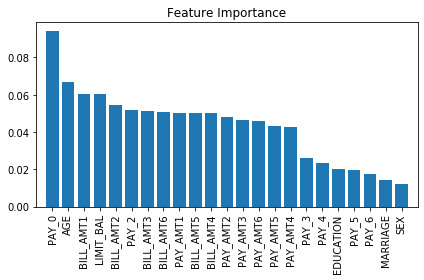

In [11]:
feat_labels = df.columns[1:24]

forest = RandomForestClassifier(n_estimators=100,
                                random_state=1,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

As we can see, the most important feature in random forest model when n_estimators=100 is `PAY_0`, which reaches 0.094127 importance score. The least importance feature is `SEX`, which reaches 0.012096 importance score.

## Part 3: Conclusions

a) What is the relationship between n_estimators, in-sample CV accuracy and computation time?

By using random forest with 10-fold cross validation, the best CV score is 0.816519, and best accuracy is 0.999 when n_estimators=100. By using only random forest method, the accuracy score is 9994074074074074 when n_estimators=100&200.

When the value of n_estimators increase, the in-sample CV accuracy also increases. However, when n_estimators is large enough, for example 100, the CV accuracy score are super close or exactly the same; while the computaiton time still increases as n_estimators increase. From the cross validation with random forest model, the averaged running time for n_estimators=100 is 11 seconds, while the one for n_estimators=200 is 23 seconds. The times has been doubled. 

b)	What is the optimal number of estimators for your forest?  

The best number of estimators are 100 and 200, which give the highest accuracy score of 0.9994074074074074. However, thinking of the computation time, I believe `n_estimators` = 100 is optimal because it runs relatively shorter time. 

c)	Which features contribute the most importance in your model according to scikit-learn function?  

`PAY_0` contribute the most importance, 9.41%.

d)	What is feature importance and how is it calculated?

Feature importance can assign a score to features based on how useful they are at predicting a target variable. This is often used in feature selection or dimension reduction because it can increase the accuracy score and/or boost the model performance in high dimensional data. It improves the efficiency. 

The feature importance using random forest is measured by the averaged impurity decrease computed from all decision trees in the forest. 

## Part 4: Appendix

Link to github repo:

https://github.com/yaxuanw3/IE517_F20_HW7

In [12]:
print("My name is {Yaxuan Wang}")
print("My NetID is: {662869931}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Yaxuan Wang}
My NetID is: {662869931}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
